In [1]:
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
plt.figure(figsize = (15,6))
sales_data = sales_data.drop(['Invoice ID'], axis = 1)
sales_data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<Figure size 1080x432 with 0 Axes>

<Figure size 3600x720 with 0 Axes>

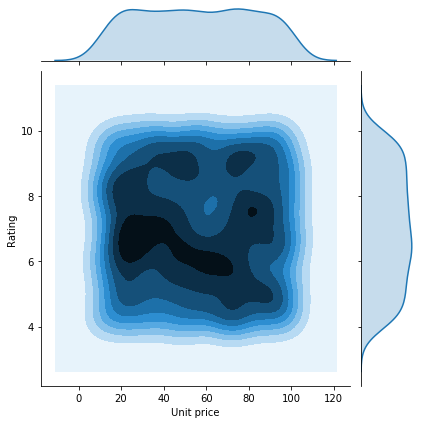

In [3]:
sales_product = pd.get_dummies(sales_data['Product line']) 
plt.figure(figsize = (50,10))
sns.jointplot(x = sales_data['Unit price'] , y = sales_data['Rating'] , kind = 'kde') 

Text(0.5, 1.0, 'Branch wise Ratings')

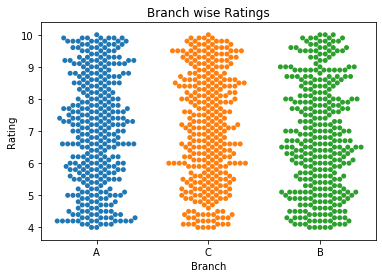

In [4]:
sns.swarmplot(x = sales_data['Branch'], y = sales_data['Rating']).set_title('Branch wise Ratings')

<Figure size 1080x432 with 0 Axes>

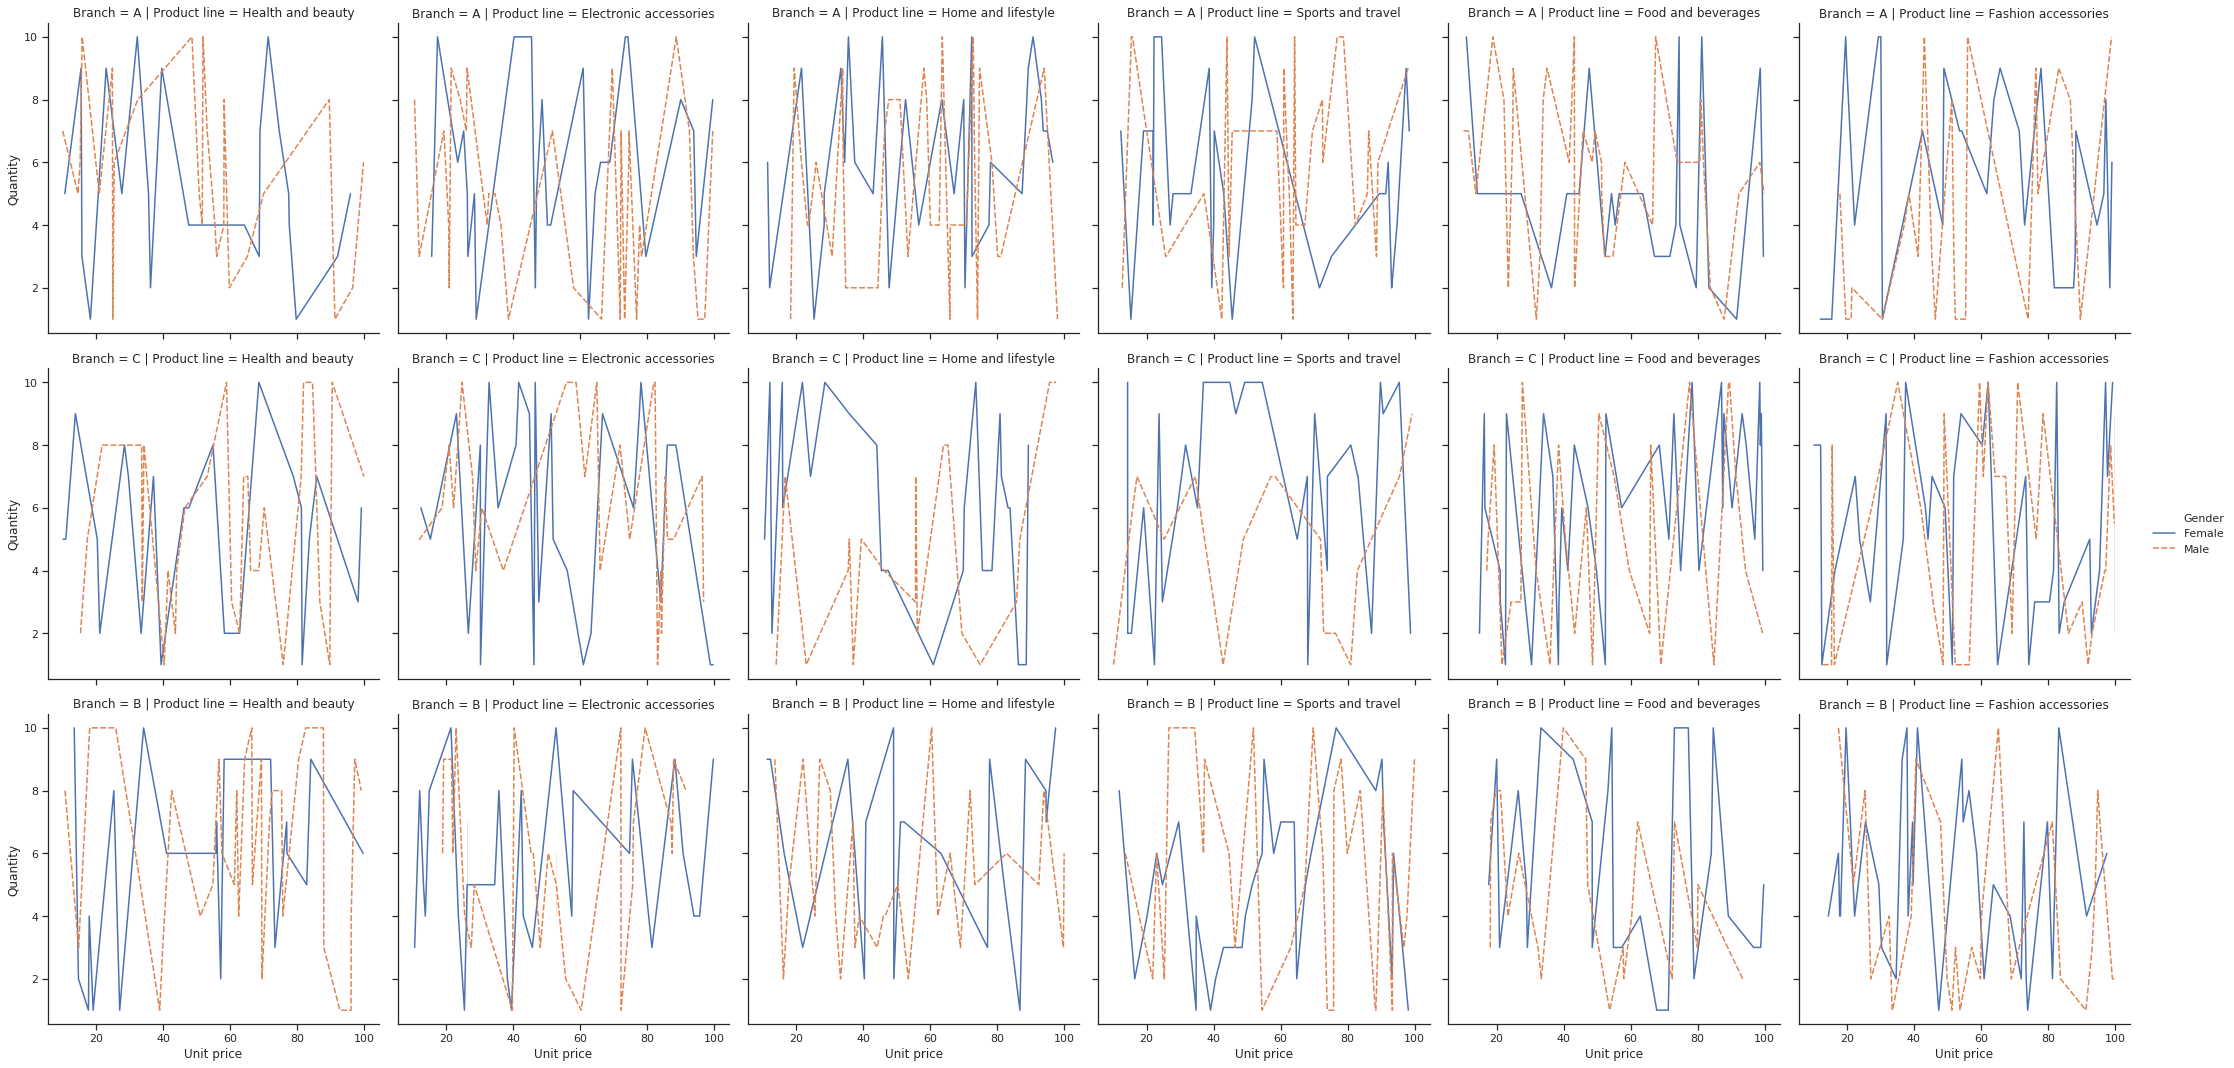

In [5]:
sns.set(style='ticks')
plt.figure(figsize = (15,6))
Total_males_females = sns.relplot(x = 'Unit price', y='Quantity' ,kind = 'line', hue = 'Gender' , style = 'Gender',col = 'Product line', row = 'Branch' , sizes = (20,100), data = sales_data )

In [6]:
pd.DataFrame(sales_data.Payment.value_counts())

,Payment
Ewallet,345
Cash,344
Credit card,311


In [7]:
sales_data.rename(columns={'Product line':'Product_line'} , inplace=True)

# Payment method opted with respect to the product category

Text(0.5, 1.0, 'Product line')

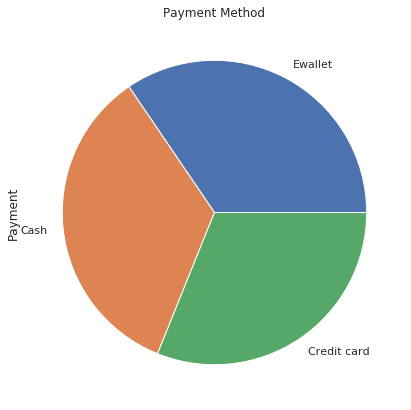

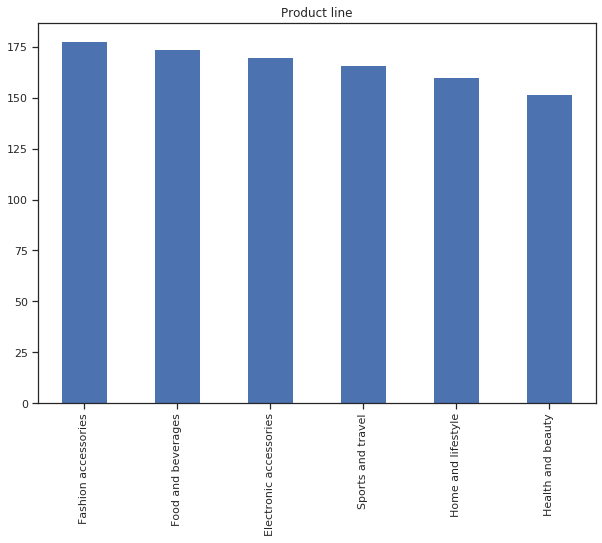

In [8]:
plt.figure(figsize = (10,7));sales_data.Payment.value_counts().plot(kind = "pie" );plt.title("Payment Method")
plt.figure(figsize = (10,7));sales_data.Product_line.value_counts().plot(kind = "bar" );plt.title("Product line")

Hence the most sold goods are Fashon Accessories.

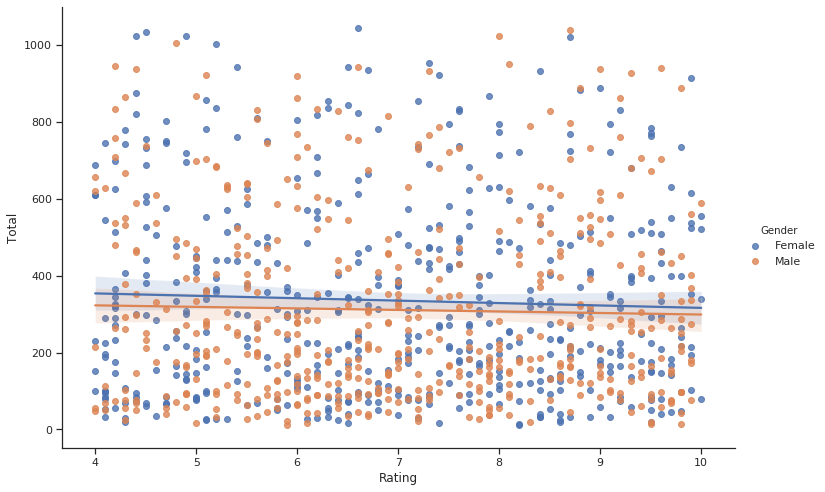

In [9]:
sns.lmplot(x = 'Rating' , y = 'Total' , data = sales_data , hue = 'Gender' , height = 7 , aspect = 1.5)

In [10]:
x = list(sales_data.columns)
x

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product_line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [11]:
y = sales_data['Rating']
features = ['Product_line', 'Unit price','Quantity','Tax 5%','Customer type','City']
X = sales_data[features]
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)
train_X= pd.get_dummies(train_X)
train_y= pd.get_dummies(train_y)
val_X= pd.get_dummies(val_X)
val_y= pd.get_dummies(val_y)
train_X.head()

,Unit price,Quantity,Tax 5%,Product_line_Electronic accessories,Product_line_Fashion accessories,Product_line_Food and beverages,Product_line_Health and beauty,Product_line_Home and lifestyle,Product_line_Sports and travel,Customer type_Member,Customer type_Normal,City_Mandalay,City_Naypyitaw,City_Yangon
298,60.01,4,12.0020,0,0,0,0,1,0,1,0,0,0,1
160,43.18,8,17.2720,0,0,1,0,0,0,0,1,0,1,0
268,70.74,4,14.1480,0,0,0,0,1,0,1,0,0,0,1
658,27.93,5,6.9825,0,0,0,0,0,1,1,0,0,0,1
996,97.38,10,48.6900,0,0,0,0,1,0,0,1,1,0,0


# Training and testing the data set using RandomForestRegressor Model¶

A randomforest model is created and then the training data is fit to that model. Later the trained model is used to predict in order to validate the model. The mean absolute error is calculated to estimate the error difference between the predicted values and the actual values.

In [12]:
leaf_model = RandomForestRegressor(random_state = 1)
leaf_model.fit(train_X,train_y)
predict_value = leaf_model.predict(val_X)
predict_value
mean_error = mean_absolute_error(val_y,predict_value)
print('The Mean Absolute Error is : {}'.format(mean_error))

The Mean Absolute Error is : 0.032192786885245864
